In [12]:
##https://www.kaggle.com/shubhamksingh/create-beautiful-notebooks-formatting-tutorial
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Slash \ 
#read data
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])


In [ ]:
#show data details
print('data = \n' ,data.head(10) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(4,4))


In [ ]:
#=========================================================================

# adding a new column called ones before the data
data.insert(0, 'Ones', 1) # insert add value 0 is location ones column name 1 is the values 
print('new data = \n' ,data.head(10) ) # will add the colmun in next row
print('**************************************')


In [ ]:
# separate X (training data) from y (target variable)
cols = data.shape[1] # the Shape related on diminsen 1 = the second value of the shape 97 X 3 which is 3 
print ('The last value of the shape =',cols)
X = data.iloc[:,0:cols-1] # the X is input and should be in capital : all rows from col 0 and - last col
y = data.iloc[:,cols-1:cols]

print('**************************************')
print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )
print('**************************************')



In [ ]:
# we will need to convert from data frames to numpy matrices in order to work with data in math opertaion 
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

print('X \n',X)
print('X.shape = ' , X.shape)
print('theta \n',theta)
print('theta.shape = ' , theta.shape)
print('y \n',y)
print('y.shape = ' , y.shape)
print('**************************************')


$\color{Red} Hypothesis: $     $\color{Yellow} {h}_{0} {(x)} = \theta _{0} + \theta _{1}x$

$\color{Red} Parameters: $    $\color{Yellow} \theta _{0},\theta _{1} $

$\color{Red} Cost Functaion:$ $\color{Yellow} J(\theta _{0},\theta _{1}) = \frac{1}{2m} \sum\limits _{i=1} ^{m } (h _\theta ({x} (^i)) - y (^i)) ^2 $

$\color{Red} Goal :$ $\color{Yellow} minimize \ \theta _{0},\theta _{1} J(\theta _{0},\theta _{1})$

$h _\theta$ = $\theta _{0} + \theta _{1}x$

- Manual 

$\color{red} 2m$ $\color{Yellow} = \ number \ of \ rows \ which \ is \ 14 $

$\color{red} J$ $\color{Yellow} = 1 / 14 \ (0+1+4+4+4+25+9)$

$\color{red} \sum\limits$ $\color{Yellow} which \ is \ the \ sum \ of \ all \ values \ 47 $

$\color{red} J$ $\color{Yellow} = \ 47/14 = \ 3.3$

$ \color{Yellow} 3.3 \  is \ the \ cost \ error $ 

In [38]:
#=========================================================================
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2) # Square 
#    print('z \n',z)
#    print('m ' ,len(X))
    return np.sum(z) / (2 * len(X)) # Len return number of rows  

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

print('**********************************************')


computeCost(X, y, theta) =  32.072733877455676
**********************************************


<span style="color:Yellow;">

## Gradient Descent
- While we looking for the value of Theta 0 and Theta 1 which is going to minimize the The J Valuse (cost Function) which is the cost function, we will assume some value of Theta. then we will gradually minimize the values until we get the minimum value of J 


$\color{red} \alpha$ =:  Decreasing Rate OR learning rate alpha When Aplha low value the learning rate is acuurate and the step is small but when the alpha value high is less accurate and the step is bigger.  

$ \color{red} \theta _{0}$ $ := \theta _{0} =\alpha \frac{1}{m} \sum\limits _{i=1} ^{m } (h _\theta (x _{i}) -y _{i}) $ 

$ \color{red}\theta _{1}$ $ :=\theta _{1} =\alpha \frac{1}{m} \sum\limits _{i=1} ^{m } ((h _\theta (x _{i}) -y _{i}) x _{i}$ 

$\color{red} Hypothesis: $  $\color{Yellow} {h} _\theta {(x)} = \theta _{0} + \theta _{1} x$

$\color{red} definition:$ $\color{Yellow} \theta _ 0 = y \ intercept $ 

$\color{red} definition:$ $\color{Yellow} \theta _ 1 = b \ slope $ 

In [ ]:
# GD function
# this function has 5 input 
def gradientDescent(X, y, theta, alpha, iters):
    # Matrix named temp 
    temp = np.matrix(np.zeros(theta.shape)) # 1 X 2
    #print ('Print the list of shape \n ',temp) 
    parameters = int(theta.ravel().shape[1]) 
    #print ('P =  \n ', parameters)
    cost = np.zeros(iters)
    # print (cost) # 1000 list of Zeros 

    for i in range(iters): # 0,1,2,3,4,99,999
        # h(x) = X * theta -y 
        error = (X * theta.T) - y
        
        for j in range(parameters): # 0,1 which is the column one and 1 is the Population values
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
       # Update      
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost # this function has to return  

# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000 
# perform gradient descent to "fit" the model parameters
# Two Variabele 
g, cost = gradientDescent(X, y, theta, alpha, iters)

print('g = ' , g)
print('cost  = ' , cost[0:50] )
print('The last computeCost = ' , computeCost(X, y, g))
print('**************************************')



In [ ]:
# get best fit line
x = np.linspace(data.Population.min(), data.Population.max(), 100)
print('x \n',x)
print('g \n',g)

f = g[0, 0] + (g[0, 1] * x)
print('f \n',f)



In [ ]:
# draw the line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')

Text(0.5, 1.0, 'Error vs. Training Epoch')

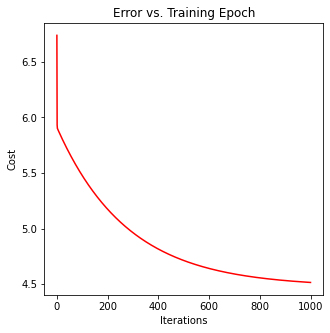

In [56]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
# arrange from 0 until 1000 
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
